# Python Simulation Graph for forecasts

Do you ever contemplate what is the best way to present a models performance? Should I talk about R-Square, RMSE, Accuracy, or just tell my manager that I placed it into a black box and it works well. 

Below I will show you how to create the animate graph.

## My Experience

I had a project where I was tasked to forecast the frequency of a metric. My management team wanted an automated program that would run every month to give us insight as to the frequency a year in advance.

Once I developed the forecasting model, I had to validate how well the model would perform if we ran it every month for a year. Essentially, I simulated the use of the model. I wanted to present this as an animated graph that would show the date the model was run and its result against the actuals.

#### libraries

In [18]:
#import
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from pandas.plotting import register_matplotlib_converters
from matplotlib.animation import FuncAnimation
import pandas as pd
import matplotlib.dates as mdates
import os

#### Data

Let us create a dataset to use in our graph. There are four columns, the date the forecast was run, the date it was predicting, the actual value and the predicted value.

In [16]:
# create an array of 5 dates starting at '2015-02-24', one per day
prediction_date = pd.date_range('2015-02-01', periods=24, freq='M')
forecast_run = pd.date_range('2013-02-01', periods=24, freq='M')
df = pd.DataFrame({ 'prediction_date': prediction_date,'Forecast Date': forecast_run, 'Val' : np.random.randn(len(prediction_date)),'Pred_Val' : np.random.randn(len(forecast_run))}) 

# print
df.head()

,prediction_date,Forecast Date,Val,Pred_Val
0,2015-02-28,2013-02-28,1.302723,-0.051338
1,2015-03-31,2013-03-31,0.677438,-2.960989
2,2015-04-30,2013-04-30,-0.521076,1.211435
3,2015-05-31,2013-05-31,-0.065177,1.435152
4,2015-06-30,2013-06-30,0.474794,1.507588


#### Animated Graph

Let start with some basics for the graph. We will need first create the plot and then add the boundaries of the x-axis and y-axis. Because we are using a date format 'yyyy-mm-dd' we will have the x-axis show large tick marks for the year and small tick marks for the months.

In [ ]:
#formats
years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
years_fmt = mdates.DateFormatter('%Y')
plt.style.use('seaborn-pastel')

#create the figure
fig = plt.figure() 

#figure size
plt.rcParams["figure.figsize"] = (20,10)

# round to nearest years.
datemin = np.datetime64(df['prediction_date'][0], 'Y')
datemax = np.datetime64(df['prediction_date'].iloc[-1], 'Y') + np.timedelta64(1, 'Y')

# setting a title for the plot 
plt.title('My animated forecasting graph',fontsize=18) 

#create axis limits
ax = plt.axes(xlim=(datemin, datemax), ylim=(-5, 5)) 

# format the ticks
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(years_fmt)
ax.xaxis.set_minor_locator(months)

Next we will initiate the lines that we are going to graph. 

In [ ]:
# Create empty lines we are going to plot as part of the animation
line, = ax.plot([], [], 'o',label='predicted values') 
# Static line that will appear on the graph
line2, = ax.plot(df['prediction_date'],df['Val'],color='grey',linestyle='dashed',label= 'Actual Values')


# initialization function 
def init(): 
	# creating an empty plot/frame 
	line.set_data([], []) 
	return line, 

# lists to store x and y axis points 
xdata, ydata = [], [] 

MovieWriter ffmpeg unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


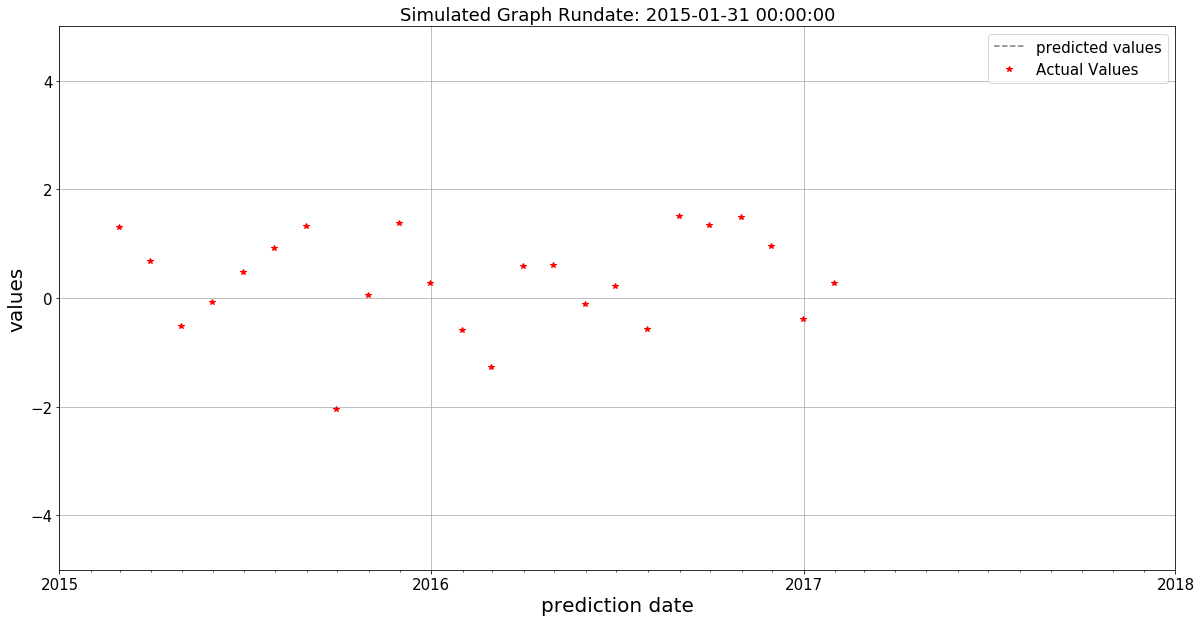

In [46]:
#formats
years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
years_fmt = mdates.DateFormatter('%Y')
plt.style.use('seaborn-pastel')

#create the figure
fig = plt.figure() 

#figure size
plt.rcParams["figure.figsize"] = (20,10)

# round to nearest years.
datemin = np.datetime64(df['prediction_date'][0], 'Y')
datemax = np.datetime64(df['prediction_date'].iloc[-1], 'Y') + np.timedelta64(1, 'Y')

# setting a title for the plot 
plt.title('My animated forecasting graph',fontsize=18) 

#create axis limits
ax = plt.axes(xlim=(datemin, datemax), ylim=(-5, 5)) 

# format the ticks
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(years_fmt)
ax.xaxis.set_minor_locator(months)

# Create empty lines we are going to plot as part of the animation
line, = ax.plot([], [],color='grey',linestyle='dashed',label='predicted values') 
# Static line that will appear on the graph
line2, = ax.plot(df['prediction_date'],df['Val'],'*r',label= 'Actual Values')


# initialization function 
def init(): 
	# creating an empty plot/frame 
	line.set_data([], []) 
	return line, 

# lists to store x and y axis points 
xdata, ydata = [], [] 

# animation function 
def animate(i): 
	# t is our iteration parameter
	t = i 
	
	# x, y values to be plotted
	x = df['prediction_date'][t]
	y = df['Pred_Val'][t] 
	# As t increases we will append the list of x,y values 
	xdata.append(x) 
	ydata.append(y) 
    #set the appended values into the empty line graph we created
	line.set_data(xdata, ydata) 
    # setting a title for the plot with the date the forecast ran
	plt.title('Simulated Graph Rundate: %s' %df['Forecast Date'][t],fontsize=18) 
	return line
	
    
#add legend
plt.legend(fontsize=15)
#gridline
plt.grid()
# Add x and y lables, and set their font size
plt.xlabel("prediction date", fontsize=20)
plt.ylabel("values", fontsize=20)
# Set the font size of the number lables on the axes
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# Use the FuncAnimation from matplotlib	 
anim = FuncAnimation(fig, animate, init_func=init, 
							frames=df.shape[0], blit=False,interval=500) 

#save GIF
os.chdir=("Your Path")
anim.save('my_animation.gif')